Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('medical_cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


1.Independant features are:[age,sex,bmi,children,smoker,region]
2.Dependent feature is:[charges]
3.Target feature 'charges' need to predict.
4.T

In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

<AxesSubplot:>

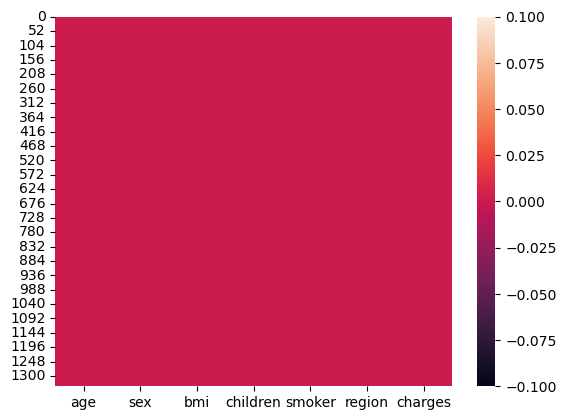

In [7]:
sns.heatmap(df.isnull())
#no missing values in dataset

1.'sex' and 'smoker' column are categorical with 2 different values.
2.Let convert them into numerical feature using map function.

In [8]:
df['sex'] = df['sex'].map({'male':0,'female':1})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


1.we can see the dtype of 'sex' and 'smoker' featues are changed.
2.After doing mapping these are no more categorical features.

In [9]:
df.nunique().sort_values()

sex            2
smoker         2
region         4
children       6
age           47
bmi          548
charges     1337
dtype: int64

1.It shows number of unique values in each column.

In [10]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [11]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


1.Age: min val of age is 18 and max is 64.25% are below the age27,
50%(meadian) are below 39 and 75% are below 51.
2.Gender : 0 for female and 1 for male.About 49.48% are females,amd remaining 50.52% are male.
3.BMI:body mass index has outlier are present,as we can see difference between 75% amd max value of bmi.
4.Children:range between o to 5.mean number of children is approximately 1.09
5.smoker:0 for non-smoker and 1 for smoker.About 20.48% of individuals are smokers.
6.Charges:If mean greater than median(50%) then perticular column is skewd right.

In [12]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
charges     1.515880
dtype: float64

1.As we can see all features has positively skewed data.
2.children feature is skewed right .

# Univariate Analysis

0    1064
1     274
Name: smoker, dtype: int64


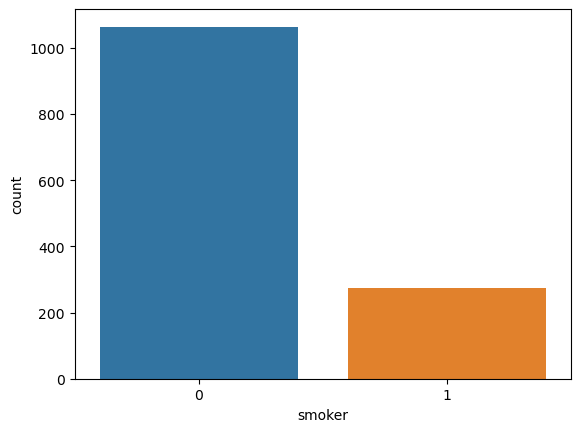

In [13]:
a = sns.countplot(x = 'smoker',data=df)
print(df['smoker'].value_counts())

1.we can see the nuber of non smoker people are too high compared to smoker.

0    676
1    662
Name: sex, dtype: int64


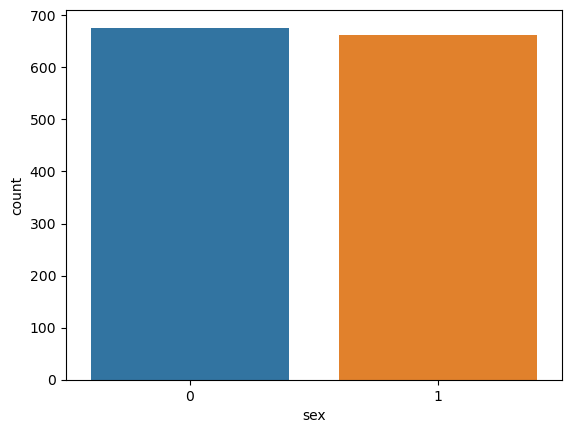

In [14]:
a = sns.countplot(x = 'sex',data=df)
print(df['sex'].value_counts())

1.0 (male) and 1 (female) are almost same.
2.so it can be a part of regression.
3.it is not a target column.


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


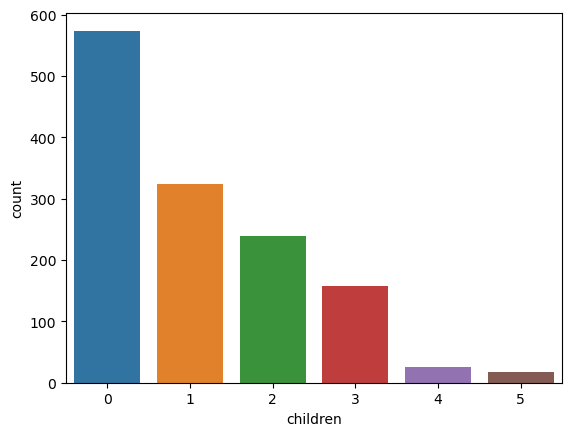

In [15]:
a = sns.countplot(x = 'children',data=df)
print(df['children'].value_counts())

1.As we can see in plot vary less amount of people has 4-5 children.
2.Most people has no children .


# Bivariate Analysis

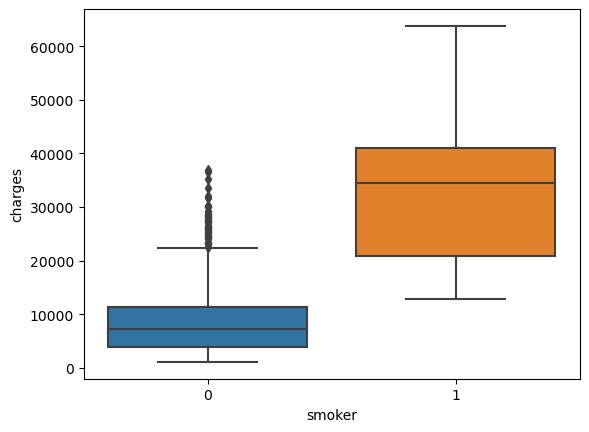

In [16]:
a = sns.boxplot(x='smoker',y ='charges',data=df)


Charges are more for smoker than the non-smoker
smoker is '0' and non-smoker is '1'

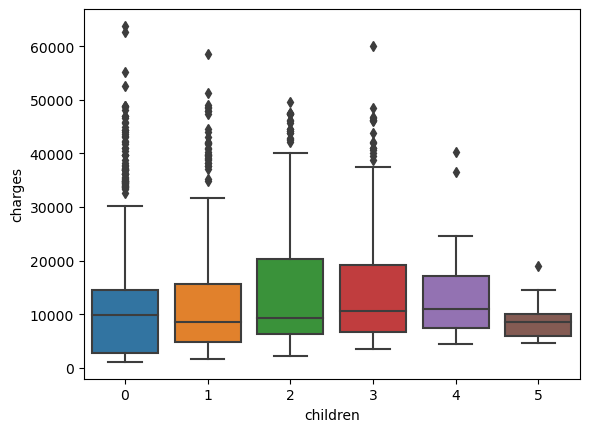

In [17]:
a = sns.boxplot(x='children',y ='charges',data=df)


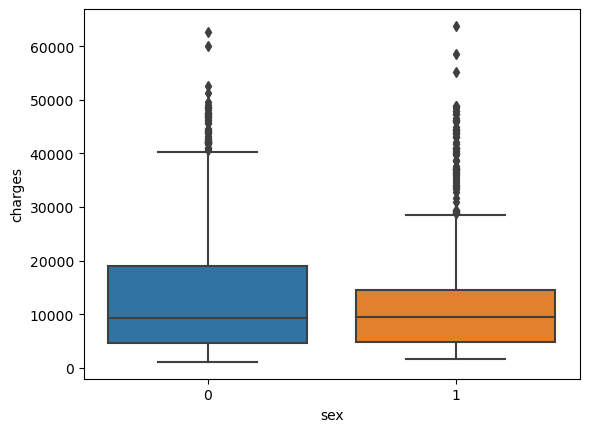

In [18]:
a = sns.boxplot(x='sex',y ='charges',data=df)


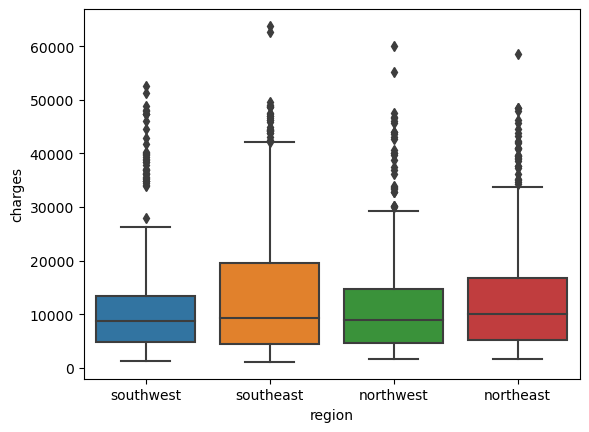

In [19]:
a = sns.boxplot(x='region',y ='charges',data=df)


Charges are more in southeast region

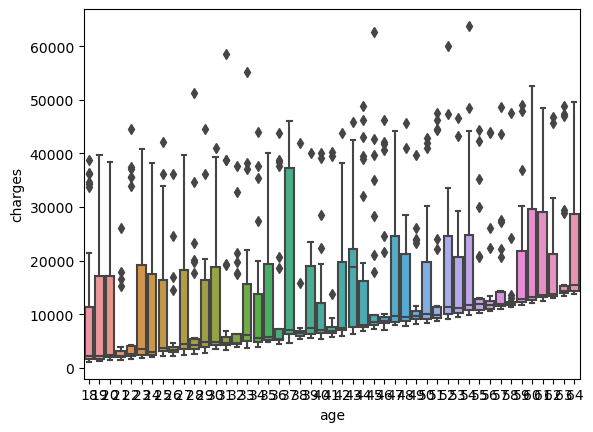

In [20]:
a = sns.boxplot(x='age',y ='charges',data=df)


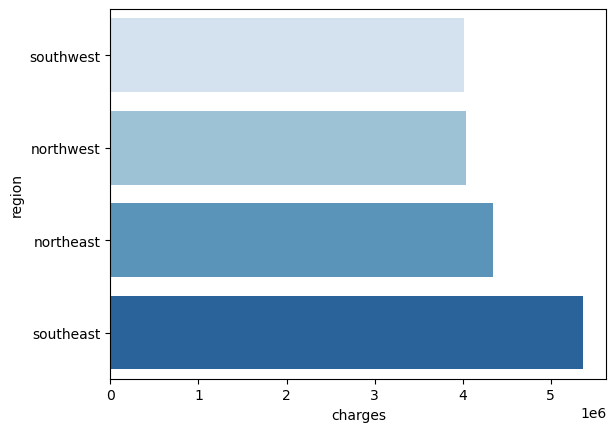

In [21]:
a = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
ax = sns.barplot(a.head(),a.head().index,palette='Blues')

The highest charges are in southeast region and the lowest are in the southwest.


# Multivariate Analysis

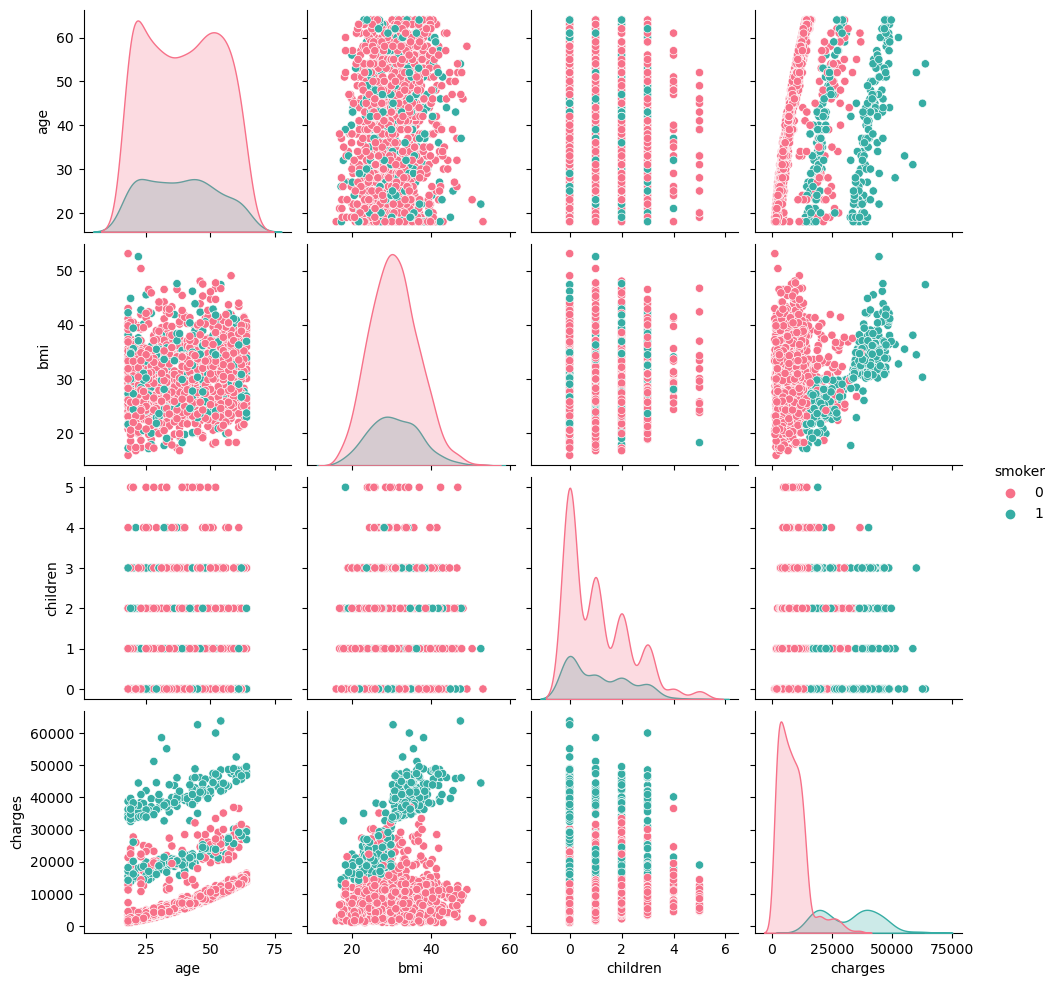

In [22]:
#Pairplot of all numerical variables
sns.pairplot(df, vars=["age", 'bmi','children','charges'],hue='smoker',palette="husl")
plt.show()

1.There seems to be a strong correlation between smoking and charges.
2.charges increases from age. if age is more then charges also increases.

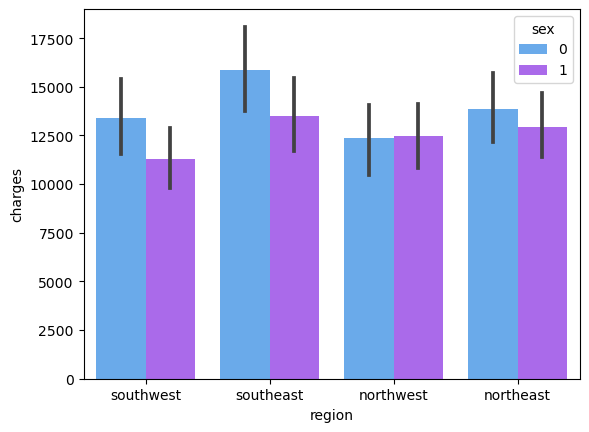

In [23]:
ax = sns.barplot(x = 'region',y = 'charges',hue = 'sex',data=df,palette='cool')

0 is male and 1 is an female.
we can see charges are high in southeast region to male.


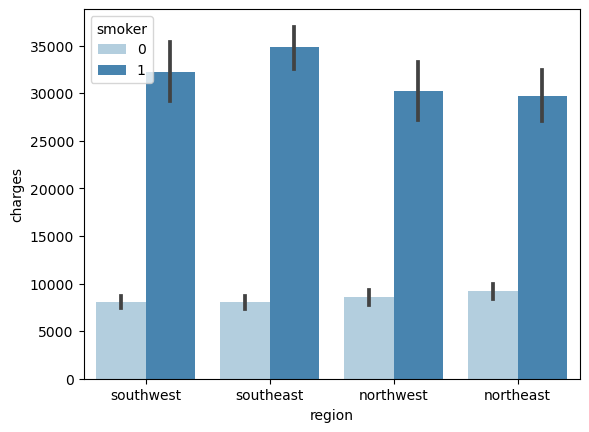

In [24]:
ax = sns.barplot(x = 'region',y = 'charges',hue = 'smoker',data=df,palette='Blues')

smokers(1) and non-smoker(0).
we can see the charges for smoker(1) sre high.
charges for non-smoker are too low.
there is an high range of smokers in southeast region.

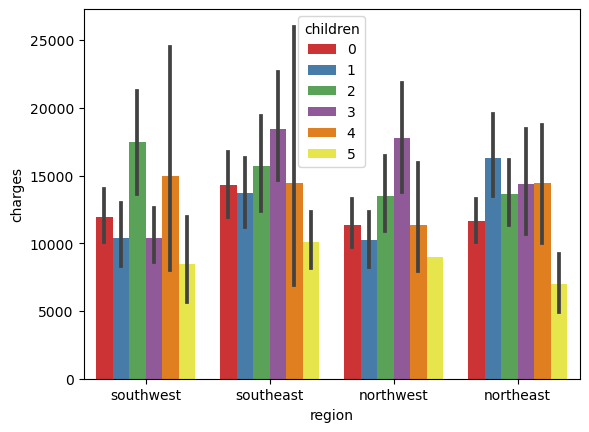

In [25]:
ax = sns.barplot(x ='region',y='charges',hue='children',data=df,palette='Set1')

charges are high in southeast region.
people with children tend to have high medical cost.

# Converting category into Numerical using LabelEncoder

In [26]:
lab = LabelEncoder()
lab.fit(df['region'].drop_duplicates())
df.region = lab.transform(df.region)


In [27]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int32
charges     float64
dtype: object

In [28]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

the column 'children' and smoker have skewness in data.
Skewness in the target variable 'charges' is often acceptable and doesn't necessarily need to be corrected.

# Remove Skewness

In [29]:
df['children'] = np.cbrt(df['children']) 

In [30]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children   -0.097116
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(3), int32(1), int64(3)
memory usage: 68.1 KB


In [32]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,0.690044,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,0.617662,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,1.259921,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,1.709976,1.000000,3.000000,63770.428010


# Correlation Between target variable and Independent Variable

In [33]:
cor = df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.048919,-0.025019,0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.016183,-0.076185,-0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.016515,0.003750,0.157566,0.198341
children,0.048919,-0.016183,0.016515,1.000000,0.011829,0.014133,0.072756
smoker,-0.025019,-0.076185,0.003750,0.011829,1.000000,-0.002181,0.787251
region,0.002127,-0.004588,0.157566,0.014133,-0.002181,1.000000,-0.006208
charges,0.299008,-0.057292,0.198341,0.072756,0.787251,-0.006208,1.000000


1.there is positive correlation between 'age' and 'charges' column.
  person's age increases, their charges increases as well.
2.There 'smoker column has strong correlation with charges feature.
3.there is an slightly -ve correlation of region with 'charges'       column.
4.'sex' column has very weak positive correlation with charges         column.

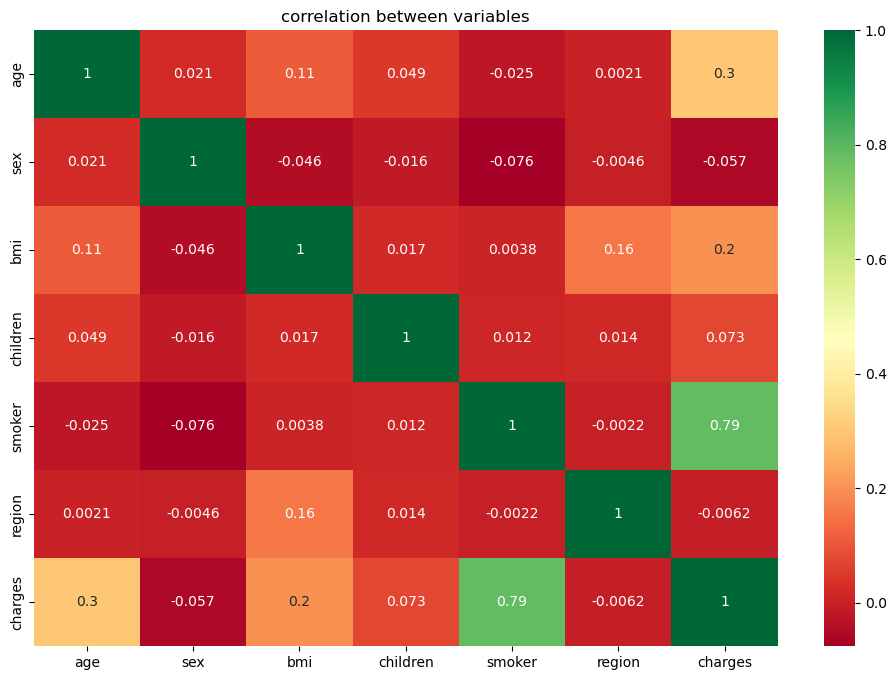

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='RdYlGn',annot = True)
plt.title('correlation between variables')
plt.show()

# Sperating Feature and label

In [35]:
x = df.drop('charges',axis = 1)
y = df['charges']

# Feature Scaling using Standard Scalarization

In [36]:
scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,1.010519,-0.453320,-1.117604,1.970587,1.343905
1,-1.509965,-0.989591,0.509621,0.502009,-0.507463,0.438495
2,-0.797954,-0.989591,0.383307,1.218282,-0.507463,0.438495
3,-0.441948,-0.989591,-1.305531,-1.117604,-0.507463,-0.466915
4,-0.513149,-0.989591,-0.292556,-1.117604,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.050297,1.218282,-0.507463,-0.466915
1334,-1.509965,1.010519,0.206139,-1.117604,-0.507463,-1.372326
1335,-1.509965,1.010519,1.014878,-1.117604,-0.507463,0.438495
1336,-1.296362,1.010519,-0.797813,-1.117604,-0.507463,1.343905


# checking VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif['features'] = x.columns
vif

,vif values,features
0,1.015956,age
1,1.008844,sex
2,1.040656,bmi
3,1.003101,children
4,1.006551,smoker
5,1.025881,region


# Modelling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


# Linear Regressor

In [40]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [41]:
print(lr.score(x_test,y_test))

0.78322152595908


In [42]:
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('np.sqrt(mean_absolute_error:',np.sqrt(mean_absolute_error(y_test,pred)))
print('r2_score:',r2_score(y_test,pred))

mean_absolute_error: 4203.9442951423
mean_squared_error: 33654583.10957519
np.sqrt(mean_absolute_error: 64.8378307405661
r2_score: 0.78322152595908


# Lasso

In [43]:
ls = Lasso()
ls.fit(x_train,y_train)


Lasso()

In [44]:
print(ls.score(x_test,y_test))

0.7832050656268996


In [45]:
a = np.array(y_test)
df = pd.DataFrame()
df['predicted'] = pred
df['original'] = a

In [46]:
df

,predicted,original
0,9005.390849,9095.06825
1,7025.632737,5272.17580
2,36801.680915,29330.98315
3,9308.968166,9301.89355
4,26924.259705,33750.29180
...,...,...
263,39007.164506,47055.53210
264,11714.069800,12222.89830
265,7933.921101,6067.12675
266,40854.808923,63770.42801
